In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("../final_mob_dataset.csv")

In [3]:
dataset.head()

,product id,price,sale,weight,resolution,ppi,cpu core,cpu freq,internal mem,ram,rearcam,Front cam,battery,thickness
0,203,2357,10.0,135.0,5.2,424.0,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10.0,125.0,4.0,233.0,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10.0,110.0,4.7,312.0,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11.0,118.5,4.0,233.0,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11.0,125.0,4.0,233.0,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


## Total count of unique values in product id column

In [4]:
dataset["product id"].value_counts()

product id
66      2
1062    2
832     2
133     2
827     2
       ..
203     1
10      1
622     1
40      1
856     1
Name: count, Length: 83, dtype: int64

## Total count of uniques values in internal mem column

In [6]:
dataset["internal mem"].value_counts()

internal mem
16.000    40
32.000    40
8.000     28
4.000     18
64.000    11
0.000     10
68.000     8
0.004      2
0.128      2
0.256      2
Name: count, dtype: int64

## Check each mobile product price 

In [8]:
product_price_df = dataset.groupby(by='product id').agg({'price': 'sum'}).rename(columns={'product id': 'Product ID',
                                                'price': 'Total Price'}).reset_index()
product_price_df = product_price_df.sort_values('Total Price', ascending=False)
product_price_df

,product id,Total Price
23,290,8518
77,1216,7674
79,1248,7316
76,1206,7102
73,1145,6632
...,...,...
62,1026,1582
7,64,1508
75,1198,1410
38,701,1256


###  As per the above result , we can conclude that product id 290 is having high price than other products

In [9]:
## Here we can get the price for each Mobile Products

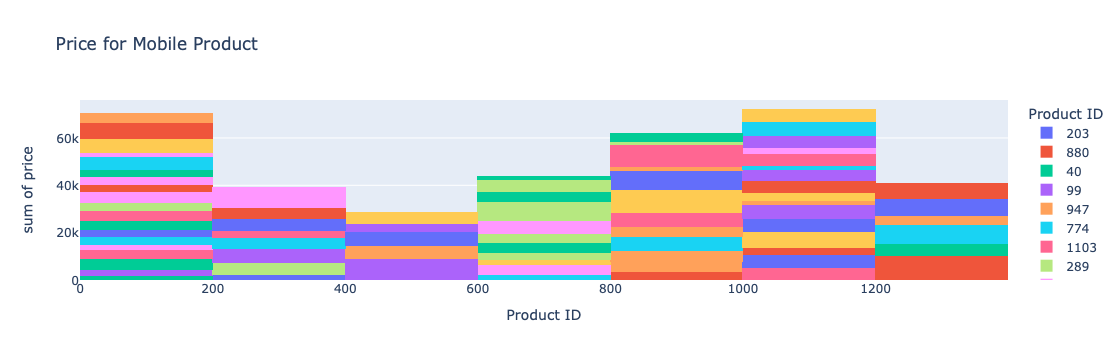

In [14]:
import plotly.express as px
fig = px.histogram(dataset, x='product id', y= 'price', color= 'product id',
                    title= 'Price for Mobile Product',
                    labels= {'product id': 'Product ID'})
fig.show()

## Check Brand and the price

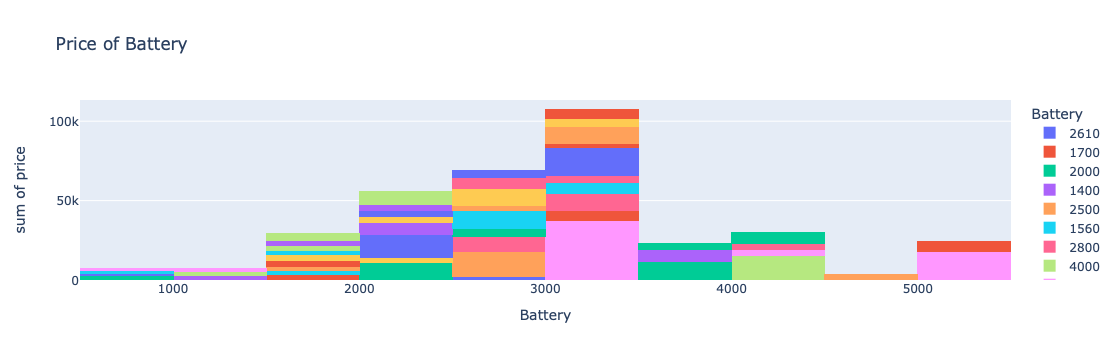

In [16]:
import plotly.express as px
fig = px.histogram(dataset, x='battery', y= 'price', color= 'battery',
                    title= 'Price of Battery',
                    labels= {'battery': 'Battery'})
fig.show()

## Which product has high sale

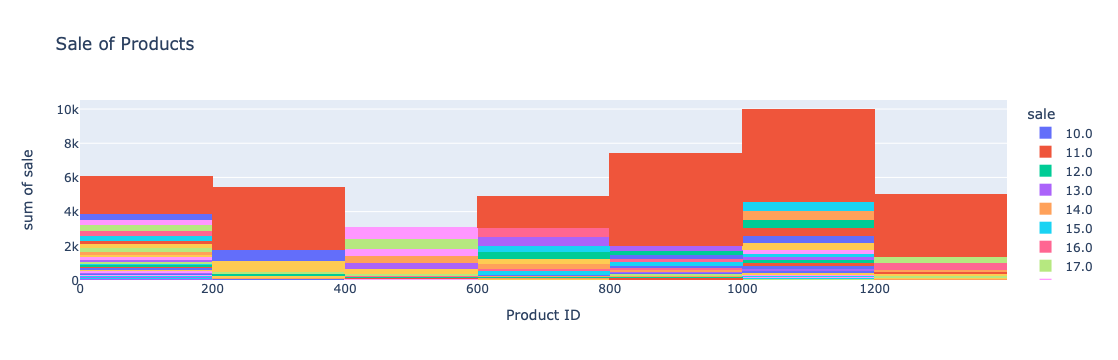

In [17]:
import plotly.express as px
fig = px.histogram(dataset, x='product id', y= 'sale', color= 'sale',
                    title= 'Sale of Products',
                    labels= {'product id': 'Product ID'})
fig.show()

## what is the average sale for each product which has internal memory 16 GB

In [24]:
internal_mem_16_gb = dataset[dataset["internal mem"]==16]

In [25]:
internal_mem_16_gb_avg_sale_list = internal_mem_16_gb.groupby(by=['product id'])['sale'].mean().reset_index()
internal_mem_16_gb_avg_sale_list

,product id,sale
0,14,94.5
1,104,29.0
2,133,211.0
3,187,21.5
4,203,10.0
5,218,79.0
6,622,16.0
7,662,36.0
8,739,48.5
9,798,379.0


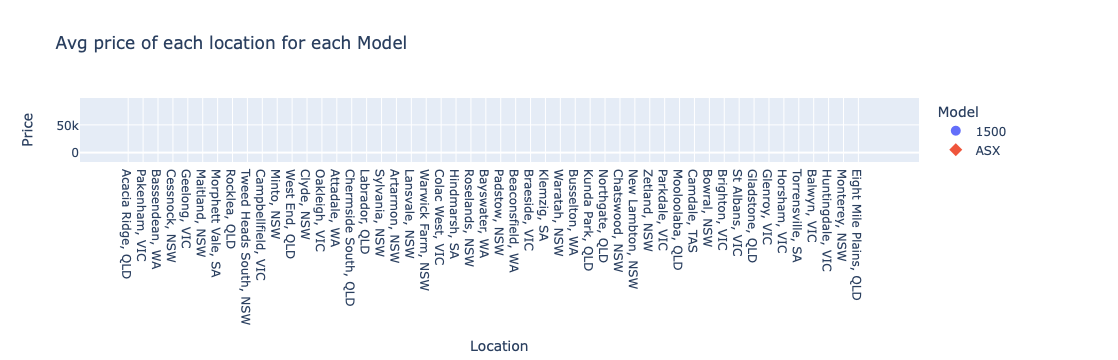

In [25]:
fig = px.scatter(used_car_price_list, x='Location', y='Price', color='Model', symbol='Model',
                title=' Avg price of each location for each Model').update_traces(marker_size=10)
fig.show()

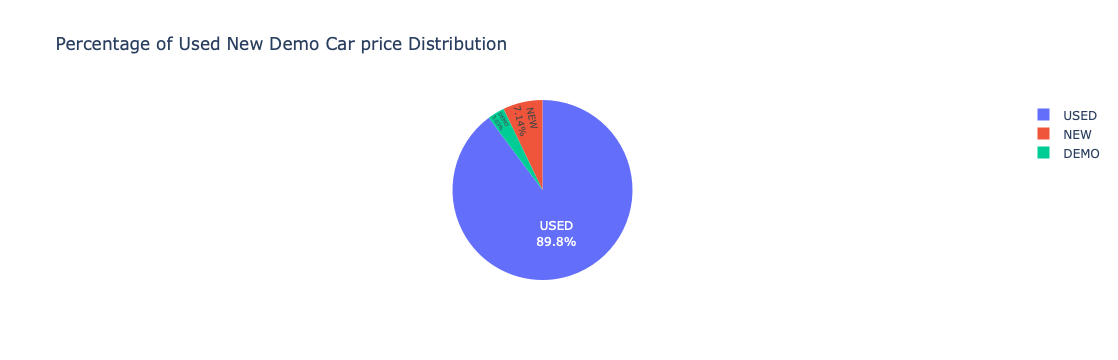

In [26]:
# How we can achive the same through Data Visualization
brand_price_df = dataset.groupby(by='UsedOrNew').agg({'Price': 'count'}).rename(columns={'UsedOrNew': 'Used Or New',
                                                'Price': 'Total Price'}).reset_index()
brand_price_df = brand_price_df.sort_values('Total Price', ascending=False)
brand_price_df
fig = px.pie(brand_price_df, names='UsedOrNew', values='Total Price', color='UsedOrNew',
title='Percentage of Used New Demo Car price Distribution').update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## As per the above result, we can conclude that used car are sold by consumer most of the time